# Smith Creek Water Level, Salinity, and Precipitation Visualization

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter

import datetime
import os

### Critical note
The way that CORMP creates its CSV with different sensors or marginally different timestamps leads to multiple identical timestamps for different sensor types. Accordingly, if a single file with all desired parameters is downloaded, Python/Pandas appears to throw away one of each row wherever there are identical timestamps even if there is unique data! E.g., water levels in one row, salinity and temperatures in another.

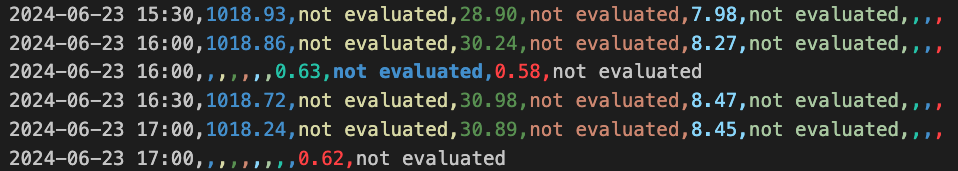

The workaround is to download one CSV for each different data/sensor type.

### Download steps
- Go to https://wl.cormp.org/
- Select a relevant station, then Download Data link under station information. Select Query Builder.
- Select desired parameters. For this analysis 
  * SMC-23ST-WL Water level
- Click "Go". Change time zone to UTC and units to metric. Leave quality filter off (we can QC in this analysis).
- In browse bar, change start date to 2024-04-06 (start date of water level sensor deployment, truncating first few samples during setup on 2024-04-05)
- Under "Data," download data as CSV

**THEN REPEAT FOR OTHER SENSOR/DATA TYPES!**
- Go to https://wl.cormp.org/
- Select a relevant station, then Download Data link under station information. Select Query Builder.
- Select desired parameters. For this analysis 
  * SMC-KERR-WL Water level
- Click "Go". Change time zone to UTC and units to metric. Leave quality filter off (we can QC in this analysis).
- In browse bar, change start date to 2024-04-06 (start date of water level sensor deployment, truncating first few samples during setup on 2024-04-05)
- Under "Data," download data as CSV

**REPEAT**
- Go to https://wl.cormp.org/
- Select a relevant station, then Download Data link under station information. Select Query Builder.
- Select desired parameters. For this analysis 
  * SMC-23ST Air pressure
  * SMC-23ST Air temperature
  * SMC-23ST Salinity
- Click "Go". Change time zone to UTC and units to metric. Leave quality filter off (we can QC in this analysis).
- In browse bar, change start date to 2024-04-06 (start date of water level sensor deployment, truncating first few samples during setup on 2024-04-05)
- Under "Data," download data as CSV

### Read in data from CORMP server, downloaded as described above

In [4]:
# 23rd St Water Level
filename = 'CORMP_SMC-23ST-WL_20240406-20241114.csv'
filepath = os.path.join('Data', 'CORMP_Data_SMC', filename)

df_23stWL = pd.read_csv(filepath, header = 6, parse_dates = [0])

df_23stWL.set_index('Time (utc)', inplace = True)

df_23stWL.head()

,SMC-23ST-WL Water level (m),SMC-23ST-WL Water level (m) quality
Time (utc),,
2024-04-06 05:00:00,-0.32,good
2024-04-06 06:00:00,-0.64,good
2024-04-06 07:00:00,-0.79,good
2024-04-06 08:00:00,-0.64,good
2024-04-06 09:00:00,-0.13,good


In [6]:
# Kerr Ave Water Level 
filename = 'CORMP_SMC-KERR-WL_20240406-20241114.csv'
filepath = os.path.join('Data', 'CORMP_Data_SMC', filename)

df_kerrWL = pd.read_csv(filepath, header = 6, parse_dates = [0])

df_kerrWL.set_index('Time (utc)', inplace = True)

df_kerrWL.head()

,SMC-KERR-WL Water level (m),SMC-KERR-WL Water level (m) quality
Time (utc),,
2024-04-06 05:00:00,-0.12,good
2024-04-06 06:00:00,-0.59,good
2024-04-06 07:00:00,-0.78,good
2024-04-06 08:00:00,-0.68,good
2024-04-06 09:00:00,-0.19,good


In [8]:
# 23rd St salinity, air temp, air pressure
filename = 'CORMP_SMC-23ST-TSP_20240406-20241114.csv'
filepath = os.path.join('Data', 'CORMP_Data_SMC', filename)

df_23stWQ = pd.read_csv(filepath, header = 7, parse_dates = [0])

df_23stWQ.set_index('Time (utc)', inplace = True)

df_23stWQ.head()

,SMC-23ST Air pressure (mbar),SMC-23ST Air pressure (mbar) quality,SMC-23ST Air temperature (deg C),SMC-23ST Air temperature (deg C) quality,SMC-23ST Salinity (ppt),SMC-23ST Salinity (ppt) quality
Time (utc),,,,,,
2024-04-26 16:00:00,NaN,NaN,NaN,NaN,1.73,not evaluated
2024-04-26 17:00:00,NaN,NaN,NaN,NaN,1.77,not evaluated
2024-04-26 18:00:00,NaN,NaN,NaN,NaN,1.28,not evaluated
2024-04-26 19:00:00,NaN,NaN,NaN,NaN,0.73,not evaluated
2024-04-26 20:00:00,NaN,NaN,20.99,not evaluated,0.51,not evaluated


### Concatenate dataframes to make single full DF of CORMP data

In [11]:
cormp_df = pd.concat([df_kerrWL, df_23stWL, df_23stWQ], axis=1)
cormp_df.tail()

,SMC-KERR-WL Water level (m),SMC-KERR-WL Water level (m) quality,SMC-23ST-WL Water level (m),SMC-23ST-WL Water level (m) quality,SMC-23ST Air pressure (mbar),SMC-23ST Air pressure (mbar) quality,SMC-23ST Air temperature (deg C),SMC-23ST Air temperature (deg C) quality,SMC-23ST Salinity (ppt),SMC-23ST Salinity (ppt) quality
Time (utc),,,,,,,,,,
2024-11-14 19:00:00,0.17,not evaluated,-0.16,not evaluated,1017.59,not evaluated,17.07,not evaluated,4.42,not evaluated
2024-11-14 20:00:00,-0.37,not evaluated,-0.41,not evaluated,1016.71,not evaluated,17.00,not evaluated,3.67,not evaluated
2024-11-14 21:00:00,-0.36,not evaluated,-0.32,not evaluated,1016.11,not evaluated,17.00,not evaluated,3.67,not evaluated
2024-11-14 22:00:00,0.09,not evaluated,0.17,not evaluated,1014.56,not evaluated,16.92,not evaluated,4.71,not evaluated
2024-11-14 23:00:00,0.41,not evaluated,0.50,not evaluated,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Size and column header names
print(len(cormp_df))
print(cormp_df.columns)

9274
Index(['SMC-KERR-WL Water level (m)', 'SMC-KERR-WL Water level (m) quality',
       'SMC-23ST-WL Water level (m)', 'SMC-23ST-WL Water level (m) quality',
       'SMC-23ST Air pressure (mbar)', 'SMC-23ST Air pressure (mbar) quality',
       'SMC-23ST Air temperature (deg C)',
       'SMC-23ST Air temperature (deg C) quality', 'SMC-23ST Salinity (ppt)',
       'SMC-23ST Salinity (ppt) quality'],
      dtype='object')


In [15]:
# Fill NaNs on 30-min intervals for water level sensors which only measure on 60-min intervals
cormp_df_interp = cormp_df.interpolate(method='linear')

/var/folders/9z/6wqx9_n10fxgqqh0dmf4kv6j7wvkzn/T/ipykernel_82137/3445256316.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  cormp_df_interp = cormp_df.interpolate(method='linear')


### Plot Water Levels

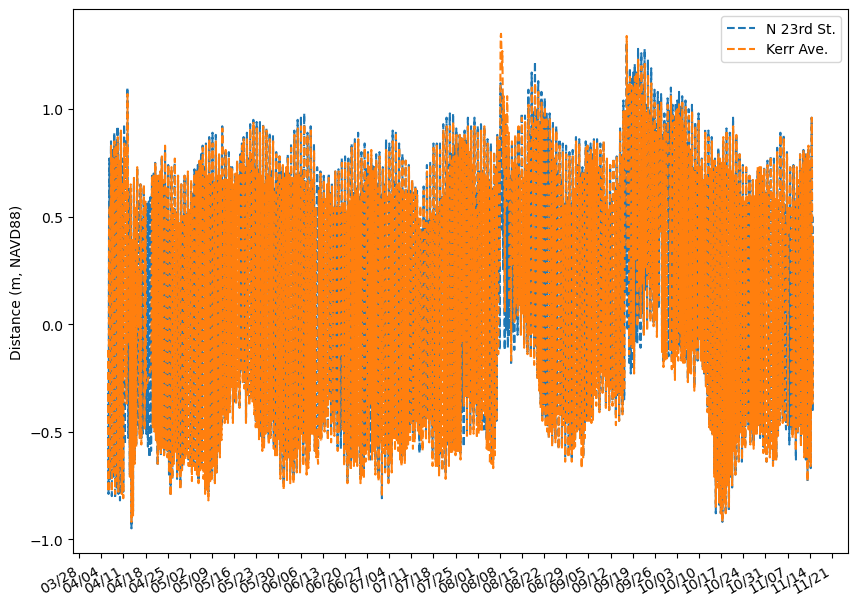

In [18]:
fig, axs = plt.subplots(figsize = (10, 8))
axs.plot(cormp_df_interp.index, cormp_df_interp['SMC-23ST-WL Water level (m)'], '--', label = 'N 23rd St.')
axs.plot(cormp_df_interp.index, cormp_df_interp['SMC-KERR-WL Water level (m)'], '--', label = 'Kerr Ave.')

axs.set_ylabel('Distance (m, NAVD88)')
axs.legend()

# xtick dates are poorly spaced
axs.xaxis.set_major_locator(ticker.MultipleLocator(7))

date_form = DateFormatter("%m/%d")
axs.xaxis.set_major_formatter(date_form)

fig.autofmt_xdate()

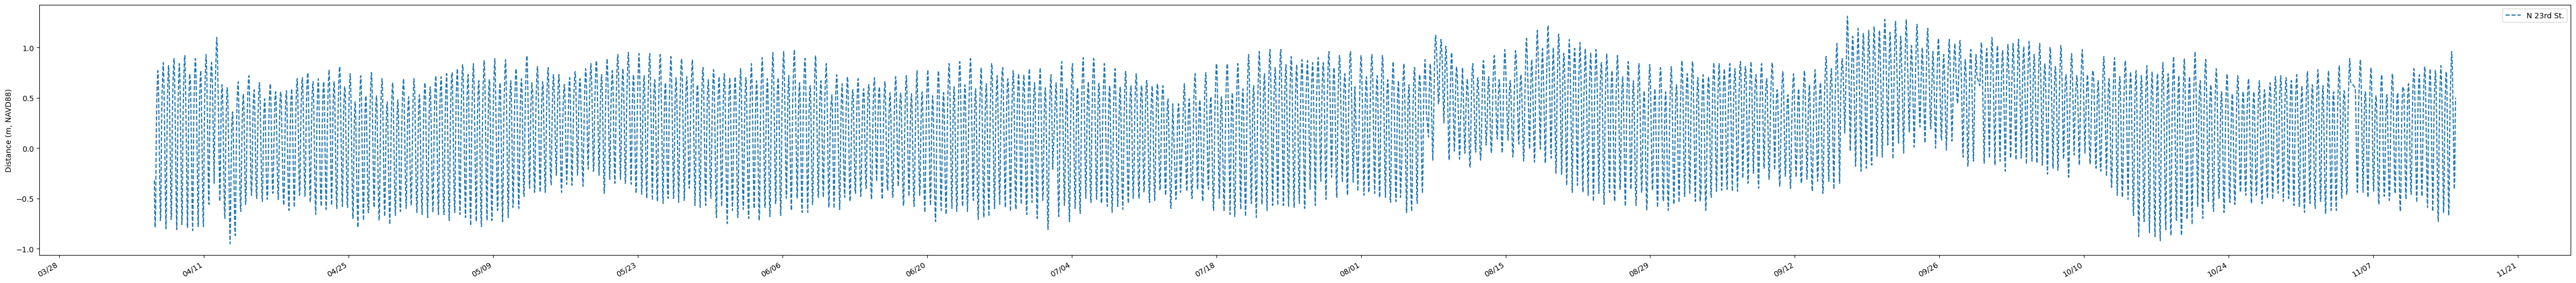

In [20]:
fig, axs = plt.subplots(figsize = (48, 6))
axs.plot(cormp_df_interp.index, cormp_df_interp['SMC-23ST-WL Water level (m)'], '--', label = 'N 23rd St.')
# axs.plot(cormp_df_interp.index, cormp_df_interp['SMC-KERR-WL Water level (m)'], '--', label = 'Kerr Ave.')

axs.set_ylabel('Distance (m, NAVD88)')
axs.legend()

# xtick dates are poorly spaced
axs.xaxis.set_major_locator(ticker.MultipleLocator(14))

date_form = DateFormatter("%m/%d")
axs.xaxis.set_major_formatter(date_form)

plt.tight_layout()
fig.autofmt_xdate()

plt.savefig("tides_wide.png", dpi = 300, transparent = True)

### Plot all data from CORMP

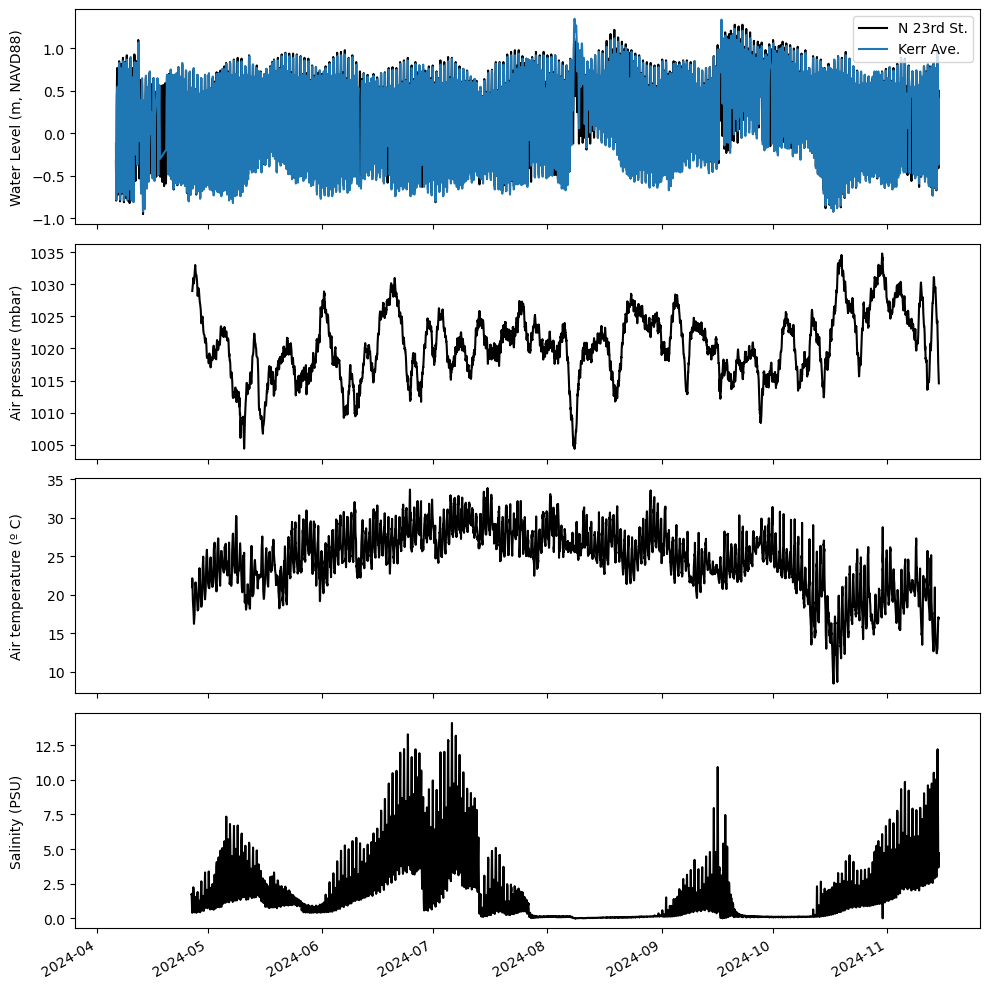

In [23]:
fig, axs = plt.subplots(4, 1, figsize = (10, 10), sharex = True)
axs[0].plot(cormp_df_interp.index, cormp_df_interp['SMC-23ST-WL Water level (m)'], 'k-', label = 'N 23rd St.')
axs[0].plot(cormp_df_interp.index, cormp_df_interp['SMC-KERR-WL Water level (m)'], '-', label = 'Kerr Ave.')

axs[0].set_ylabel('Water Level (m, NAVD88)')
axs[0].legend()

axs[1].plot(cormp_df_interp.index, cormp_df_interp.loc[:, 'SMC-23ST Air pressure (mbar)'], 'k-')
axs[1].set_ylabel('Air pressure (mbar)')

axs[2].plot(cormp_df_interp.index, cormp_df_interp.loc[:, 'SMC-23ST Air temperature (deg C)'], 'k-')
axs[2].set_ylabel('Air temperature (º C)')

axs[3].plot(cormp_df_interp.index, cormp_df_interp.loc[:, 'SMC-23ST Salinity (ppt)'], 'k-')
axs[3].set_ylabel('Salinity (PSU)')

# # Add precip in a second y-axis
# ax2 = axs[2].twinx()
# ax2.plot(df_met['DATE'], df_met['PRCP'], 'b--')
# ax2.set_ylabel('Daily Precip (mm)', color='b')
# ax2.tick_params('y', colors='b')

# axs[0].xaxis_date() # make sure it knows that x is a date/time
# axs[0].set_xlim(df_full.index.min(), df_full.index.max())

# for axi in axs.flat:
# #     axi.xaxis.set_major_locator(plt.MaxNLocator(3))
# #     print(axi)
#     axi.yaxis.set_major_locator(plt.MaxNLocator(5))
# #     axi.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.02f"))

# # xtick dates are poorly spaced
# axs[0].xaxis.set_major_locator(ticker.MultipleLocator(7))

# date_form = DateFormatter("%m/%d")
# axs[0].xaxis.set_major_formatter(date_form)


fig.autofmt_xdate() # makes the date labels easier to read.
plt.tight_layout()
fig.align_ylabels()

# plt.savefig('n23rd.png', dpi = 300)

In [24]:
salt_mean_n23 = np.nanmean(cormp_df_interp.loc[:, 'SMC-23ST Salinity (ppt)'])
salt_mean_n23

1.7764619150631904

### Download ILM Met data
- Go to https://www.ncei.noaa.gov/cdo-web/
- Select "Browse Datasets"
- Select "Daily Summaries"—>"Map" (note that hourly data are only provided until 2014, so don't use hourly!)
- Click "Layers" then wrench icon and draw rectangle around AOI. (One in Myrtle Grove area, GHCND:USC00319461). Also ILM airport. 
- Click "Add to cart" then "Custom GHCN-Daily CSV"
- Under "Station Detail & Data Flag Options", Select: Station Name, Geographic Location, Include Data Flags, use metric option
- Under "Select data types for custom output," select all. 
- Next/enter email address, check email.
- Don't remove quotation marks in VS code. Pandas can handle.

In [28]:
filename = '3844515_ILM_weather_20240101_20241111.csv'
filepath = os.path.join('Data', 'Met_Data', filename)

df_met = pd.read_csv(filepath, header = 0, parse_dates = [5])
df_met.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,...,WT01,WT01_ATTRIBUTES,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT08,WT08_ATTRIBUTES
0,USW00013748,"WILMINGTON INTERNATIONAL AIRPORT, NC US",34.26678,-77.89987,7.0,2024-01-01,4.3,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013748,"WILMINGTON INTERNATIONAL AIRPORT, NC US",34.26678,-77.89987,7.0,2024-01-02,3.4,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013748,"WILMINGTON INTERNATIONAL AIRPORT, NC US",34.26678,-77.89987,7.0,2024-01-03,1.6,",,W",NaN,NaN,...,1.0,",,W",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00013748,"WILMINGTON INTERNATIONAL AIRPORT, NC US",34.26678,-77.89987,7.0,2024-01-04,3.4,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013748,"WILMINGTON INTERNATIONAL AIRPORT, NC US",34.26678,-77.89987,7.0,2024-01-05,2.4,",,W",NaN,NaN,...,1.0,",,W",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


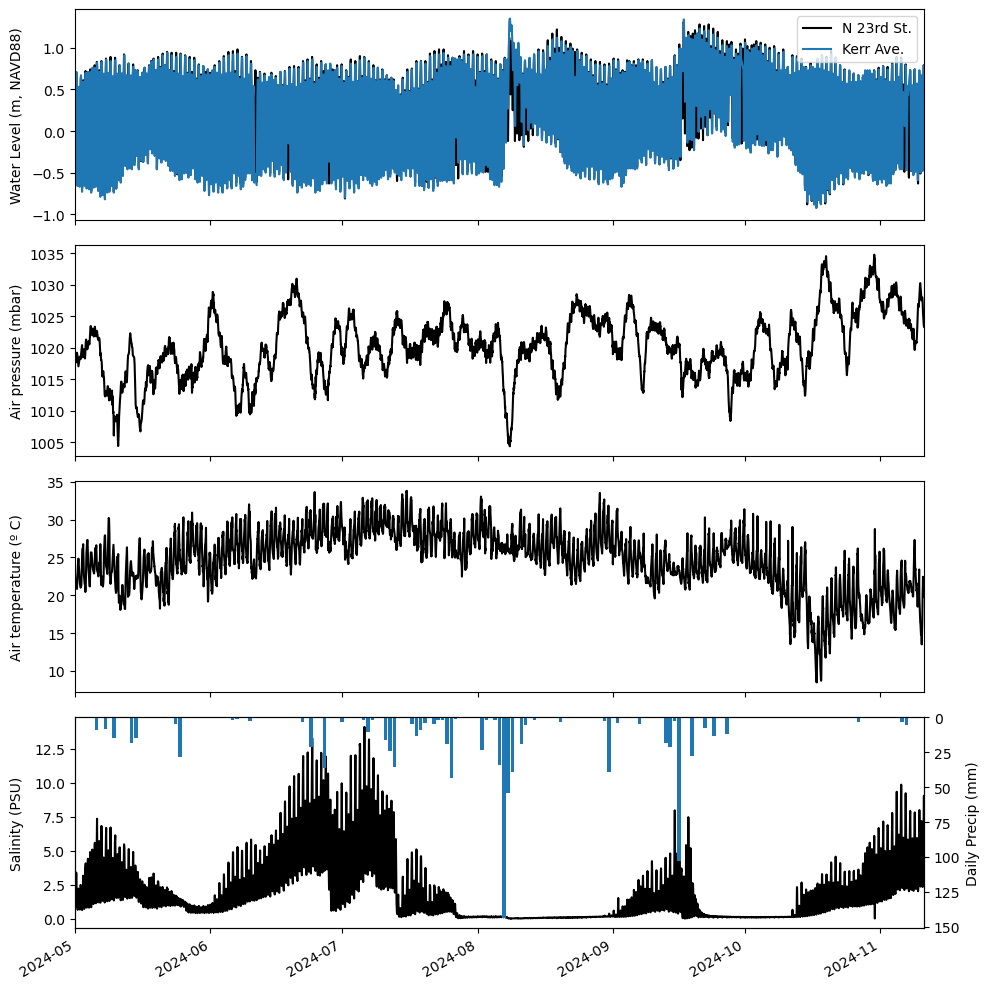

In [30]:
fig, axs = plt.subplots(4, 1, figsize = (10, 10), sharex = True)
axs[0].plot(cormp_df_interp.index, cormp_df_interp['SMC-23ST-WL Water level (m)'], 'k-', label = 'N 23rd St.')
axs[0].plot(cormp_df_interp.index, cormp_df_interp['SMC-KERR-WL Water level (m)'], '-', label = 'Kerr Ave.')

axs[0].set_ylabel('Water Level (m, NAVD88)')
axs[0].legend()

axs[1].plot(cormp_df_interp.index, cormp_df_interp.loc[:, 'SMC-23ST Air pressure (mbar)'], 'k-')
axs[1].set_ylabel('Air pressure (mbar)')

axs[2].plot(cormp_df_interp.index, cormp_df_interp.loc[:, 'SMC-23ST Air temperature (deg C)'], 'k-')
axs[2].set_ylabel('Air temperature (º C)')

axs[3].plot(cormp_df_interp.index, cormp_df_interp.loc[:, 'SMC-23ST Salinity (ppt)'], 'k-')
axs[3].set_ylabel('Salinity (PSU)')

# Add precip in a second y-axis
ax2 = axs[3].twinx()
ax2.bar(df_met['DATE'], df_met['PRCP'])
ax2.set_ylabel('Daily Precip (mm)')#, color='b')
ax2.tick_params('y')#, colors='b')

plt.gca().invert_yaxis()

# axs[0].xaxis_date() # make sure it knows that x is a date/time
# axs[0].set_xlim(df_full.index.min(), df_full.index.max())

# for axi in axs.flat:
# #     axi.xaxis.set_major_locator(plt.MaxNLocator(3))
# #     print(axi)
#     axi.yaxis.set_major_locator(plt.MaxNLocator(5))
# #     axi.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.02f"))

# # xtick dates are poorly spaced
# axs[0].xaxis.set_major_locator(ticker.MultipleLocator(7))

# date_form = DateFormatter("%m/%d")
# axs[0].xaxis.set_major_formatter(date_form)

axs[3].set_xlim([datetime.date(2024, 5, 1), datetime.date(2024, 11, 11)])

fig.autofmt_xdate() # makes the date labels easier to read.
plt.tight_layout()
fig.align_ylabels()

plt.savefig('smith_creek_level_salt_precip.png', dpi = 300)

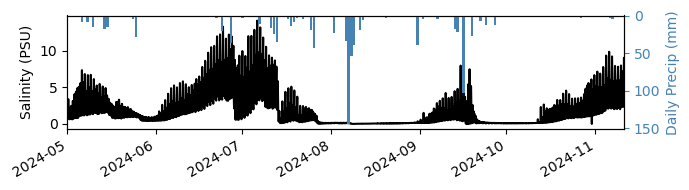

In [32]:
fig, axs = plt.subplots(1, 1, figsize = (7, 2))#, sharex = True)

axs.plot(cormp_df_interp.index, cormp_df_interp.loc[:, 'SMC-23ST Salinity (ppt)'], 'k-')
axs.set_ylabel('Salinity (PSU)')

# Add precip in a second y-axis
ax2 = axs.twinx()
ax2.bar(df_met['DATE'], df_met['PRCP'], color = 'steelblue')
ax2.set_ylabel('Daily Precip (mm)', color='steelblue')
ax2.tick_params('y', colors='steelblue')

plt.gca().invert_yaxis()

# axs[0].xaxis_date() # make sure it knows that x is a date/time
# axs[0].set_xlim(df_full.index.min(), df_full.index.max())

# for axi in axs.flat:
# #     axi.xaxis.set_major_locator(plt.MaxNLocator(3))
# #     print(axi)
#     axi.yaxis.set_major_locator(plt.MaxNLocator(5))
# #     axi.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.02f"))

# # xtick dates are poorly spaced
# axs[0].xaxis.set_major_locator(ticker.MultipleLocator(7))

# date_form = DateFormatter("%m/%d")
# axs[0].xaxis.set_major_formatter(date_form)

axs.set_xlim([datetime.date(2024, 5, 1), datetime.date(2024, 11, 11)])

fig.autofmt_xdate() # makes the date labels easier to read.
plt.tight_layout()
fig.align_ylabels()

plt.savefig('smith_creek_level_salt_precip_only.png', dpi = 300)

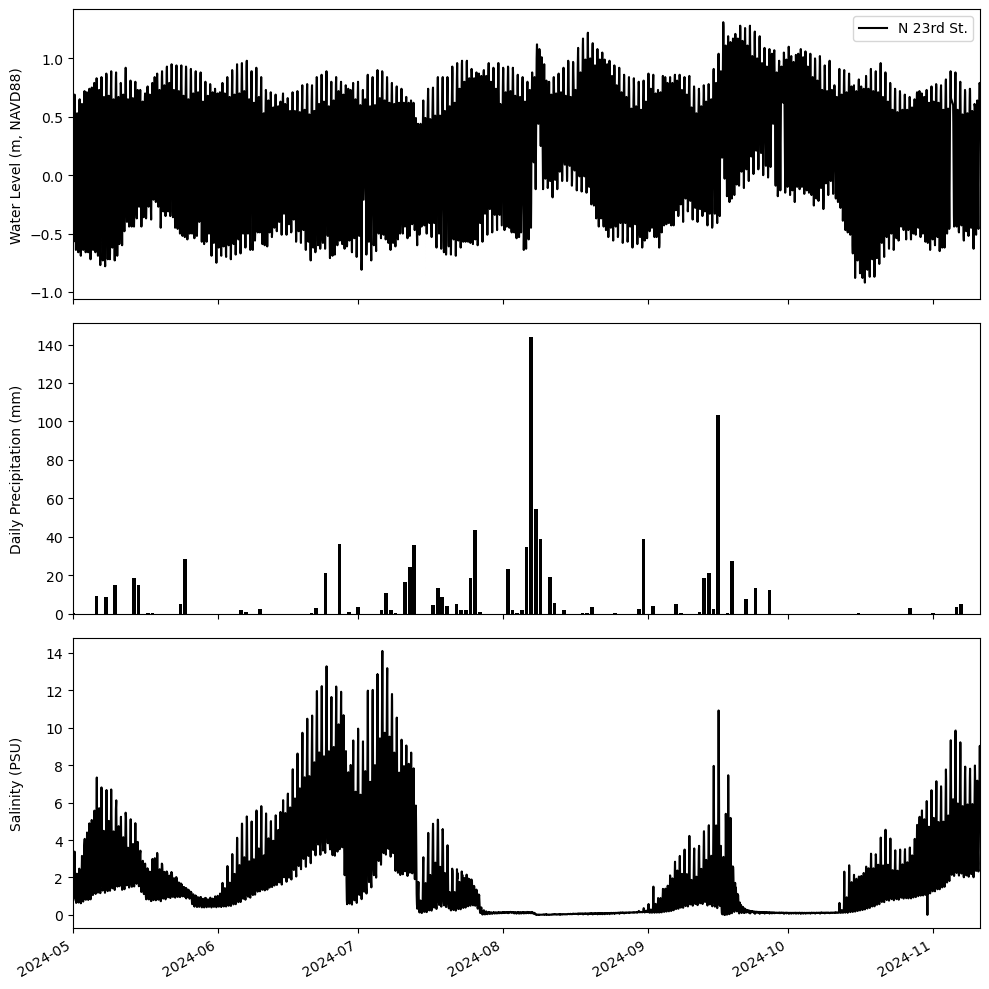

In [34]:
fig, axs = plt.subplots(3, 1, figsize = (10, 10), sharex = True)
axs[0].plot(cormp_df_interp.index, cormp_df_interp['SMC-23ST-WL Water level (m)'], 'k-', label = 'N 23rd St.')
# axs[0].plot(cormp_df_interp.index, cormp_df_interp['SMC-KERR-WL Water level (m)'], '-', label = 'Kerr Ave.')

axs[0].set_ylabel('Water Level (m, NAVD88)')
axs[0].legend()

axs[1].bar(df_met['DATE'], df_met['PRCP'], color = 'k')
axs[1].set_ylabel('Daily Precipitation (mm)')#, color='b')


axs[2].plot(cormp_df_interp.index, cormp_df_interp.loc[:, 'SMC-23ST Salinity (ppt)'], 'k-')
axs[2].set_ylabel('Salinity (PSU)')

axs[2].set_xlim([datetime.date(2024, 5, 1), datetime.date(2024, 11, 11)])

fig.autofmt_xdate() # makes the date labels easier to read.
plt.tight_layout()
fig.align_ylabels()

plt.savefig('smith_creek_level_salt_precip_noAp.png', dpi = 300)

### Examine also the Masonboro tower data
NOAA ILM data from CDO don't become immediately available, so use CORMP record of Masonboro data. Note that ILM station is on Smith Creek whereas Masonboro data are several miles away and may be less accurate.

In [37]:
# Masonboro air temp, air pressure, precip
filename = 'CORMP_Data_MSNB_S_20240406-20240917.csv'
filepath = os.path.join('Data', 'CORMP_Data_SMC', filename)

df_MSNB_S = pd.read_csv(filepath, header = 7, parse_dates = [0])

df_MSNB_S.set_index('Time (utc)', inplace = True)

df_MSNB_S.head()

,MSNB_S Wind speed (m/s),MSNB_S Wind speed (m/s) quality,MSNB_S Rain (day) (m),MSNB_S Rain (day) (m) quality
Time (utc),,,,
2024-04-06 04:00:00,5.21,good,0.0,not evaluated
2024-04-06 04:06:00,4.83,good,0.0,not evaluated
2024-04-06 04:12:00,4.93,good,0.0,not evaluated
2024-04-06 04:18:00,4.98,good,0.0,not evaluated
2024-04-06 04:24:00,5.91,good,0.0,not evaluated


In [19]:
# Select MSNB_S daily data
time_MSNB_S = df_MSNB_S.index
idx1 = (time_MSNB_S.hour == 0) & (time_MSNB_S.minute == 0)

df_MSNB_S_dly = df_MSNB_S[idx1]
df_MSNB_S_dly.head()

,MSNB_S Wind speed (m/s),MSNB_S Wind speed (m/s) quality,MSNB_S Rain (day) (m),MSNB_S Rain (day) (m) quality
Time (utc),,,,
2024-04-07,1.93,good,0.0,not evaluated
2024-04-08,2.94,good,0.0,not evaluated
2024-04-09,2.80,good,0.0,not evaluated
2024-04-10,1.02,good,0.0,not evaluated
2024-04-11,2.74,good,0.0,not evaluated


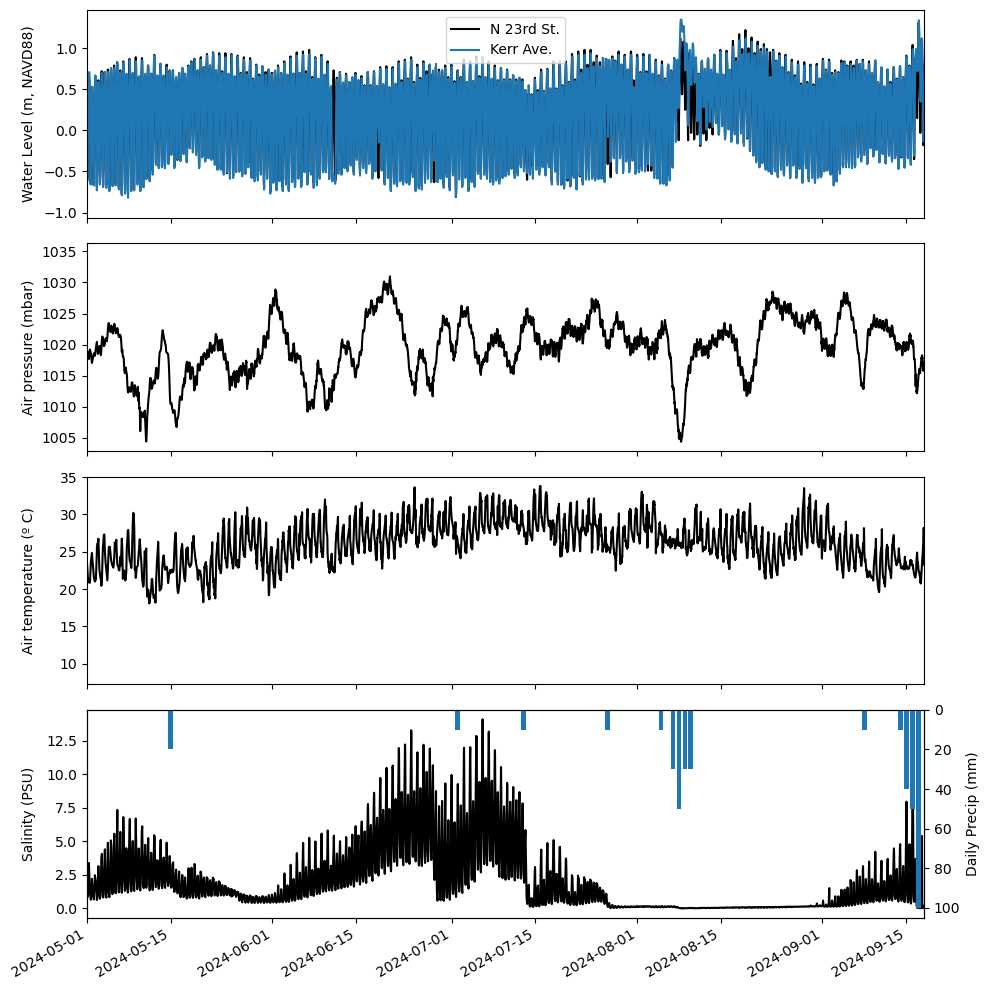

In [20]:
fig, axs = plt.subplots(4, 1, figsize = (10, 10), sharex = True)
axs[0].plot(cormp_df_interp.index, cormp_df_interp['SMC-23ST-WL Water level (m)'], 'k-', label = 'N 23rd St.')
axs[0].plot(cormp_df_interp.index, cormp_df_interp['SMC-KERR-WL Water level (m)'], '-', label = 'Kerr Ave.')

axs[0].set_ylabel('Water Level (m, NAVD88)')
axs[0].legend()

axs[1].plot(cormp_df_interp.index, cormp_df_interp.loc[:, 'SMC-23ST Air pressure (mbar)'], 'k-')
axs[1].set_ylabel('Air pressure (mbar)')

axs[2].plot(cormp_df_interp.index, cormp_df_interp.loc[:, 'SMC-23ST Air temperature (deg C)'], 'k-')
axs[2].set_ylabel('Air temperature (º C)')

axs[3].plot(cormp_df_interp.index, cormp_df_interp.loc[:, 'SMC-23ST Salinity (ppt)'], 'k-')
axs[3].set_ylabel('Salinity (PSU)')

# Add precip in a second y-axis
ax2 = axs[3].twinx()
ax2.bar(df_MSNB_S_dly.index, df_MSNB_S_dly['MSNB_S Rain (day) (m)']*1000)
ax2.set_ylabel('Daily Precip (mm)')#, color='b')
ax2.tick_params('y')#, colors='b')

plt.gca().invert_yaxis()

axs[3].set_xlim([datetime.date(2024, 5, 1), datetime.date(2024, 9, 18)])

fig.autofmt_xdate() # makes the date labels easier to read.
plt.tight_layout()
fig.align_ylabels()

plt.savefig('smith_creek_level_salt_precip_mase.png', dpi = 300)